In [1]:
import csv
from datetime import datetime
import requests
from bs4 import BeautifulSoup
import time

In [2]:
def generate_url(position, location):
    template = "https://in.indeed.com/jobs?q={}&l={}"
    position = position.replace(' ', '+')
    location = location.replace(' ', '+')
    url = template.format(position, location)
    return url

In [3]:
print(generate_url("data analyst", "pune"))

https://in.indeed.com/jobs?q=data+analyst&l=pune


In [4]:
def extract_job_data(job_card):
    try:
        title = job_card.find('h2', class_='jobTitle').text.strip()
    except:
        title = ''

    try:
        company = job_card.find('span', class_='companyName').text.strip()
    except:
        company = ''

    try:
        location = job_card.find('div', class_='companyLocation').text.strip()
    except:
        location = ''

    try:
        summary = job_card.find('div', class_='job-snippet').text.strip()
    except:
        summary = ''

    return {
        'title': title,
        'company': company,
        'location': location,
        'summary': summary
    }


In [5]:
def main(position, location):
    headers = {
        "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/115.0.0.0 Safari/537.36",
        "Accept-Language": "en-US,en;q=0.9",
        "Accept-Encoding": "gzip, deflate, br",
        "Referer": "https://www.google.com/",
        "DNT": "1",
        "Connection": "keep-alive"
    }
    
    url = generate_url(position, location)
    session = requests.Session()
    response = session.get(url, headers=headers)

    if response.status_code != 200:
        print("Failed to retrieve data:", response.status_code)
        return


    soup = BeautifulSoup(response.text, 'html.parser')
    job_cards = soup.find_all('a', class_='tapItem')

    print(f"Found {len(job_cards)} job cards")

    jobs = []

    for card in job_cards:
        job = extract_job_data(card)
        jobs.append(job)

    # Save to CSV
    filename = f"{position}_{location}_{datetime.now().strftime('%Y%m%d')}.csv"
    with open(filename, 'w', newline='', encoding='utf-8') as file:
        writer = csv.DictWriter(file, fieldnames=jobs[0].keys())
        writer.writeheader()
        writer.writerows(jobs)

    print(f"Saved {len(jobs)} job postings to {filename}")


In [6]:
main("data analyst", "pune")

Failed to retrieve data: 403


In [7]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By

print("✅ Selenium is working in Jupyter")

✅ Selenium is working in Jupyter


In [8]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By

# Update this path to where you extracted chromedriver.exe
chrome_driver_path = "E:\Projects\Data_Analytics\Coursera\Project 2 (Job sourcing)\chromedriver.exe"

# Setup service
service = Service(chrome_driver_path)
driver = webdriver.Chrome(service=service)

# Open a test website
driver.get("https://www.google.com")

print("✅ Chrome launched successfully!")

# Close the browser
driver.quit()


✅ Chrome launched successfully!


In [9]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import time

# Set path to chromedriver.exe
chrome_driver_path = "E:/Projects/Data_Analytics/Coursera/Project 2 (Job sourcing)/chromedriver.exe"
service = Service(chrome_driver_path)
driver = webdriver.Chrome(service=service)

# Open the job listings page
url = "https://www.naukri.com/data-analyst-jobs"
driver.get(url)

# Create wait object for dynamic loading
wait = WebDriverWait(driver, 10)

try:
    # Wait until job cards with class "row1" are present
    job_cards = wait.until(EC.presence_of_all_elements_located((By.CLASS_NAME, "row1")))
    print(f"🟢 Found {len(job_cards)} job cards.")

    # Wait until job cards with class "row1" are present
    job_company = wait.until(EC.presence_of_all_elements_located((By.CLASS_NAME, "row2")))
    print(f"🟢 Found {len(job_company)} job company.")
    
    # Loop through each job card
    for i, card in enumerate(job_cards, 1):
        try:
            # Job Title
            title_element = card.find_element(By.CLASS_NAME, "title")
            job_title = title_element.text.strip()
            job_link = title_element.get_attribute("href")
            
            print(f"\n🔹 Job #{i}")
            print(f"Title: {job_title}")
            print(f"Company: wam")
            print(f"Location: wam")
            print(f"Skills: wam")
            print(f"Posted: wam")
            print(f"Link : {job_link}")
        except Exception as inner_e:
            print(f"\n⚠️ Could not parse job #{i}: {inner_e}")

except Exception as outer_e:
    print(f"❌ Timeout: Job cards not found. Error: {outer_e}")

# Close the browser
driver.quit()


🟢 Found 20 job cards.
🟢 Found 20 job company.

🔹 Job #1
Title: Data Analyst (English Required)
Company: wam
Location: wam
Skills: wam
Posted: wam
Link : https://www.naukri.com/job-listings-data-analyst-english-required-peroptyx-mumbai-all-areas-0-to-5-years-190525014880

🔹 Job #2
Title: Data Analyst - B
Company: wam
Location: wam
Skills: wam
Posted: wam
Link : https://www.naukri.com/job-listings-data-analyst-b-capgemini-technology-services-india-limited-pune-2-to-5-years-010825921571

🔹 Job #3
Title: Data Analyst - B
Company: wam
Location: wam
Skills: wam
Posted: wam
Link : https://www.naukri.com/job-listings-data-analyst-b-capgemini-technology-services-india-limited-chennai-2-to-5-years-040825914472

🔹 Job #4
Title: Data Analyst Course
Company: wam
Location: wam
Skills: wam
Posted: wam
Link : https://www.naukri.com/job-listings-data-analyst-course-eduluk-new-delhi-0-to-3-years-240725503929

🔹 Job #5
Title: Data Analyst - B
Company: wam
Location: wam
Skills: wam
Posted: wam
Link : http

In [10]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
import time

# ✅ Path to chromedriver
chrome_driver_path = "E:/Projects/Data_Analytics/Coursera/Project 2 (Job sourcing)/chromedriver.exe"
service = Service(chrome_driver_path)
driver = webdriver.Chrome(service=service)

# ✅ Example job link(s)
job_links = [
    "https://www.naukri.com/job-listings-data-analyst-cindrebay-school-of-fashion-interior-design-hyderabad-101221500466"
]

for i, link in enumerate(job_links, 1):
    print(f"\n🔎 Scraping Job #{i}: {link}")
    driver.get(link)
    time.sleep(3)  # Wait for the page to fully load

    try:
        job_title = driver.find_element(By.CLASS_NAME, "jd-header-title").text.strip()
    except:
        job_title = "Not Found"

    try:
        company_name = driver.find_element(By.CLASS_NAME, "comp-name").text.strip()
    except:
        company_name = "Not Found"

    try:
        location = driver.find_element(By.CLASS_NAME, "ni-job-tuple-icon-srp-location").text.strip()
    except:
        location = "Not Found"

    try:
        experience = driver.find_element(By.CLASS_NAME, "expwdth").text.strip()
    except:
        experience = "Not Found"

    try:
        posted = driver.find_element(By.CLASS_NAME, "job-post-day").text.strip()
    except:
        posted = "Not Found"

    try:
        skill_elements = driver.find_elements(By.CSS_SELECTOR, "ul.tags-gt li")
        skills = [s.text.strip() for s in skill_elements if s.text.strip()]
        skills = ', '.join(skills)
    except:
        skills = "Not Found"

    # ✅ Print all extracted data
    print(f"✅ Job Title: {job_title}")
    print(f"🏢 Company: {company_name}")
    print(f"📍 Location: {location}")
    print(f"📊 Experience: {experience}")
    print(f"🛠️ Skills: {skills}")
    print(f"🕒 Posted: {posted}")
    print(f"🔗 Link: {link}")

driver.quit()



🔎 Scraping Job #1: https://www.naukri.com/job-listings-data-analyst-cindrebay-school-of-fashion-interior-design-hyderabad-101221500466
✅ Job Title: Not Found
🏢 Company: Large Marketing & Advertising Firm
📍 Location: Not Found
📊 Experience: Not Found
🛠️ Skills: 
🕒 Posted: 21h ago
🔗 Link: https://www.naukri.com/job-listings-data-analyst-cindrebay-school-of-fashion-interior-design-hyderabad-101221500466


In [15]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.common.exceptions import TimeoutException
import time

# Setup
chrome_path = "E:/Projects/Data_Analytics/Coursera/Project 2 (Job sourcing)/chromedriver.exe"
driver = webdriver.Chrome(service=Service(chrome_path))
wait = WebDriverWait(driver, 15)

# URL (you can change this to a different query)
url = "https://www.naukri.com/data-analyst-jobs"

driver.get(url)
time.sleep(5)  # Give time for full page load

jobs = []

try:
    job_cards = wait.until(EC.presence_of_all_elements_located((By.CSS_SELECTOR, "div.srp-jobtuple-wrapper")))
    print(f"✅ Found {len(job_cards)} job cards.")
    
    for card in job_cards:
        try:
            title = card.find_element(By.CSS_SELECTOR, 'a.title').text.strip()
        except:
            title = "Not Found"
    
        try:
            company = card.find_element(By.CSS_SELECTOR, 'a.comp-name').text.strip()
        except:
            company = "Not Found"
    
        try:
            location = card.find_element(By.CSS_SELECTOR, 'span.locWdth').text.strip()
        except:
            location = "Not Found"
    
        try:
            experience = card.find_element(By.CSS_SELECTOR, 'span.expwdth').text.strip()
        except:
            experience = "Not Found"
    
        try:
            posted = card.find_element(By.CSS_SELECTOR, 'span.job-post-day').text.strip()
        except:
            posted = "Not Found"
    
        try:
            link = card.find_element(By.CSS_SELECTOR, 'a.title').get_attribute("href")
        except:
            link = "Not Found"
    
        try:
            # Fetch skill tags if present
            skill_elements = card.find_elements(By.CSS_SELECTOR, 'ul.tags-gt li')
            skills = ', '.join([skill.text for skill in skill_elements])
        except:
            skills = ""
    
        print(f"✅ Job Title: {title}")
        print(f"🏢 Company: {company}")
        print(f"📍 Location: {location}")
        print(f"📊 Experience: {experience}")
        print(f"🛠️ Skills: {skills}")
        print(f"🕒 Posted: {posted}")
        print(f"🔗 Link: {link}")
        print("-" * 80)


except TimeoutException:
    print("❌ Timeout: Could not find job cards.")
finally:
    driver.quit()

# Show results
for job in jobs[:3]:  # Show first 3 jobs as sample
    print(job)


✅ Found 20 job cards.
✅ Job Title: Data Analyst - B
🏢 Company: Capgemini
📍 Location: Chennai
📊 Experience: 2-5 Yrs
🛠️ Skills: algorithms, charts, data analysis, data validation, dashboards, hlookup, macros, python
🕒 Posted: 2 days ago
🔗 Link: https://www.naukri.com/job-listings-data-analyst-b-capgemini-technology-services-india-limited-chennai-2-to-5-years-040825914472
--------------------------------------------------------------------------------
✅ Job Title: Data Analyst
🏢 Company: Kotak Life Insurance
📍 Location: Mumbai Suburban, Goregaon
📊 Experience: 1-3 Yrs
🛠️ Skills: SQL, Alternate Channel, Power Bi, Data Visualization, Advanced Excel, Data Analytics, Python, Channel
🕒 Posted: 2 days ago
🔗 Link: https://www.naukri.com/job-listings-data-analyst-kotak-life-insurance-mumbai-suburban-goregaon-1-to-3-years-040825922752
--------------------------------------------------------------------------------
✅ Job Title: Data Analyst
🏢 Company: NCR Corporation
📍 Location: Gurugram
📊 Experienc

In [17]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.common.exceptions import TimeoutException
import time

# Setup
chrome_path = "E:/Projects/Data_Analytics/Coursera/Project 2 (Job sourcing)/chromedriver.exe"
driver = webdriver.Chrome(service=Service(chrome_path))
wait = WebDriverWait(driver, 15)

# Prepare to collect all job data
all_jobs = []

# Loop through pagination URLs (pages 1 to 10)
for page in range(1, 11):
    if page == 1:
        url = "https://www.naukri.com/data-analyst-jobs"
    else:
        url = f"https://www.naukri.com/data-analyst-jobs-{page}"
    
    print(f"\n📄 Scraping Page {page}: {url}")
    driver.get(url)
    time.sleep(5)  # Wait for full page load
    
    try:
        job_cards = wait.until(EC.presence_of_all_elements_located((By.CSS_SELECTOR, "div.srp-jobtuple-wrapper")))
        print(f"✅ Found {len(job_cards)} job cards.")

        for card in job_cards:
            try:
                title = card.find_element(By.CSS_SELECTOR, 'a.title').text.strip()
            except:
                title = "Not Found"
        
            try:
                company = card.find_element(By.CSS_SELECTOR, 'a.comp-name').text.strip()
            except:
                company = "Not Found"
        
            try:
                location = card.find_element(By.CSS_SELECTOR, 'span.locWdth').text.strip()
            except:
                location = "Not Found"
        
            try:
                experience = card.find_element(By.CSS_SELECTOR, 'span.expwdth').text.strip()
            except:
                experience = "Not Found"
        
            try:
                posted = card.find_element(By.CSS_SELECTOR, 'span.job-post-day').text.strip()
            except:
                posted = "Not Found"
        
            try:
                link = card.find_element(By.CSS_SELECTOR, 'a.title').get_attribute("href")
            except:
                link = "Not Found"
        
            try:
                skill_elements = card.find_elements(By.CSS_SELECTOR, 'ul.tags-gt li')
                skills = ', '.join([skill.text for skill in skill_elements])
            except:
                skills = ""
        
            job_data = {
                "title": title,
                "company": company,
                "location": location,
                "experience": experience,
                "skills": skills,
                "posted": posted,
                "link": link
            }

            all_jobs.append(job_data)

            # Print job for console visibility
            print(f"✅ Job Title: {title}")
            print(f"🏢 Company: {company}")
            print(f"📍 Location: {location}")
            print(f"📊 Experience: {experience}")
            print(f"🛠️ Skills: {skills}")
            print(f"🕒 Posted: {posted}")
            print(f"🔗 Link: {link}")
            print("-" * 80)

    except TimeoutException:
        print("❌ Timeout: Could not find job cards.")

driver.quit()



📄 Scraping Page 1: https://www.naukri.com/data-analyst-jobs
✅ Found 20 job cards.
✅ Job Title: Data Analyst -Survey Administration
🏢 Company: Mercer
📍 Location: Gurugram
📊 Experience: 1-6 Yrs
🛠️ Skills: data analysis, data validation, documentation, vlookup, data collection, hlookup, python, project management
🕒 Posted: 2 weeks ago
🔗 Link: https://www.naukri.com/job-listings-data-analyst-survey-administration-marsh-mclennan-global-services-india-private-limited-gurugram-1-to-6-years-220725922260
--------------------------------------------------------------------------------
✅ Job Title: Data Analyst - B
🏢 Company: Capgemini
📍 Location: Chennai
📊 Experience: 2-5 Yrs
🛠️ Skills: algorithms, charts, data analysis, data validation, dashboards, hlookup, macros, python
🕒 Posted: 2 days ago
🔗 Link: https://www.naukri.com/job-listings-data-analyst-b-capgemini-technology-services-india-limited-chennai-2-to-5-years-040825914472
-------------------------------------------------------------------

In [2]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.common.exceptions import TimeoutException
import pandas as pd
import time

# Setup
chrome_path = "E:/Projects/Data_Analytics/Coursera/Project 2 (Job sourcing)/chromedriver.exe"
driver = webdriver.Chrome(service=Service(chrome_path))
wait = WebDriverWait(driver, 15)

# Prepare to collect all job data
all_jobs = []

# Loop through pagination URLs (pages 1 to 10)
for page in range(1, 11):
    if page == 1:
        url = "https://www.naukri.com/data-analyst-jobs"
    else:
        url = f"https://www.naukri.com/data-analyst-jobs-{page}"
    
    print(f"\n📄 Scraping Page {page}: {url}")
    driver.get(url)
    time.sleep(5)  # Wait for full page load
    
    try:
        job_cards = wait.until(EC.presence_of_all_elements_located((By.CSS_SELECTOR, "div.srp-jobtuple-wrapper")))
        print(f"✅ Found {len(job_cards)} job cards.")

        for card in job_cards:
            try:
                title = card.find_element(By.CSS_SELECTOR, 'a.title').text.strip()
            except:
                title = "Not Found"
        
            try:
                company = card.find_element(By.CSS_SELECTOR, 'a.comp-name').text.strip()
            except:
                company = "Not Found"
        
            try:
                location = card.find_element(By.CSS_SELECTOR, 'span.locWdth').text.strip()
            except:
                location = "Not Found"
        
            try:
                experience = card.find_element(By.CSS_SELECTOR, 'span.expwdth').text.strip()
            except:
                experience = "Not Found"
        
            try:
                posted = card.find_element(By.CSS_SELECTOR, 'span.job-post-day').text.strip()
            except:
                posted = "Not Found"
        
            try:
                link = card.find_element(By.CSS_SELECTOR, 'a.title').get_attribute("href")
            except:
                link = "Not Found"
        
            try:
                skill_elements = card.find_elements(By.CSS_SELECTOR, 'ul.tags-gt li')
                skills = ', '.join([skill.text for skill in skill_elements])
            except:
                skills = ""
        
            job_data = {
                "title": title,
                "company": company,
                "location": location,
                "experience": experience,
                "skills": skills,
                "posted": posted,
                "link": link
            }

            all_jobs.append(job_data)

            # Print job for console visibility
            print(f"✅ Job Title: {title}")
            print(f"🏢 Company: {company}")
            print(f"📍 Location: {location}")
            print(f"📊 Experience: {experience}")
            print(f"🛠️ Skills: {skills}")
            print(f"🕒 Posted: {posted}")
            print(f"🔗 Link: {link}")
            print("-" * 80)

    except TimeoutException:
        print("❌ Timeout: Could not find job cards.")

driver.quit()

# ✅ Convert to DataFrame
df = pd.DataFrame(all_jobs)

# ✅ Save to CSV
output_path = "naukri_data_analyst_all_jobs.csv"
df.to_csv(output_path, index=False, encoding='utf-8-sig')
print(f"📁 Saved {len(df)} job records to: {output_path}")



📄 Scraping Page 1: https://www.naukri.com/data-analyst-jobs
✅ Found 20 job cards.
✅ Job Title: Data Analyst - B
🏢 Company: Capgemini
📍 Location: Pune
📊 Experience: 2-5 Yrs
🛠️ Skills: algorithms, charts, data analysis, data validation, dashboards, hlookup, macros, python
🕒 Posted: 6 days ago
🔗 Link: https://www.naukri.com/job-listings-data-analyst-b-capgemini-technology-services-india-limited-pune-2-to-5-years-010825921571
--------------------------------------------------------------------------------
✅ Job Title: Data Analyst
🏢 Company: Kotak Life Insurance
📍 Location: Mumbai Suburban, Goregaon
📊 Experience: 1-3 Yrs
🛠️ Skills: SQL, Alternate Channel, Power Bi, Data Visualization, Advanced Excel, Data Analytics, Python, Channel
🕒 Posted: 3 days ago
🔗 Link: https://www.naukri.com/job-listings-data-analyst-kotak-life-insurance-mumbai-suburban-goregaon-1-to-3-years-040825922752
--------------------------------------------------------------------------------
✅ Job Title: Data Analyst L1
🏢

📊 Top 15 Most In-Demand Skills:
data analysis         15
python                12
data analytics         9
sql                    6
dashboards             5
data validation        5
charts                 4
macros                 4
data analyst           3
analysis               3
data visualization     3
data management        3
hlookup                3
algorithms             3
power bi               3
Name: count, dtype: int64
✅ Saved top skills to 'top_skills.csv'


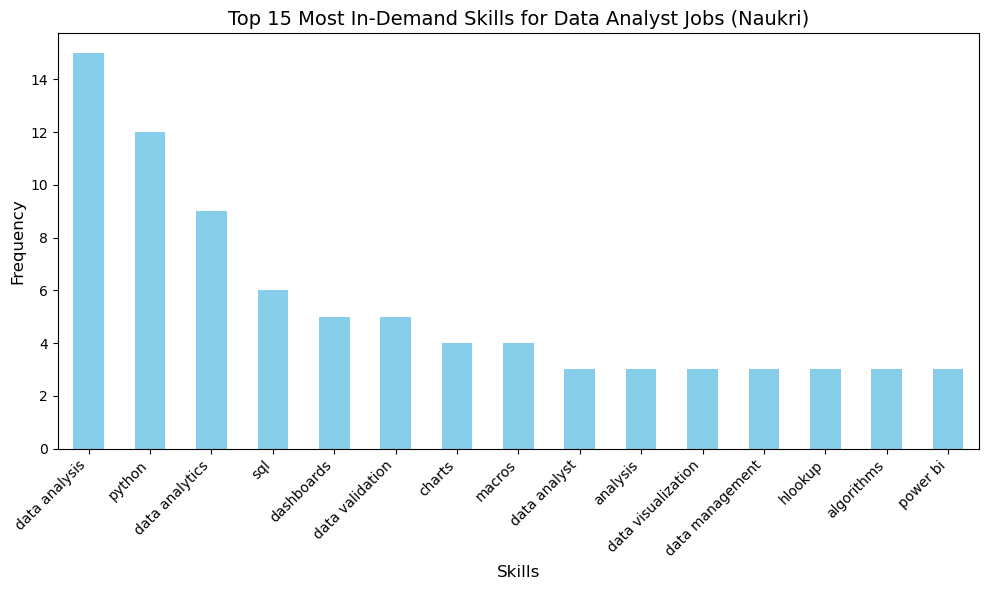

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# ===== 1️⃣ Load Data =====
df = pd.read_csv("naukri_data_analyst_jobs.csv")

# ===== 2️⃣ Clean & Process Skills =====
# Ensure 'Skills' column exists and handle NaNs
df['Skills'] = df['Skills'].fillna("")

# Convert all skills to lowercase, remove extra spaces
df['Skills'] = df['Skills'].apply(lambda x: ', '.join(sorted(set(skill.strip().lower() for skill in x.split(',') if skill.strip()))))

# ===== 3️⃣ Split Skills into Individual List =====
skill_list = []
for skills in df['Skills']:
    skill_list.extend(skills.split(', '))

# Remove any empty strings
skill_list = [skill for skill in skill_list if skill]

# ===== 4️⃣ Count Skill Demand =====
skill_counts = pd.Series(skill_list).value_counts()

# Top 15 most in-demand skills
top_skills = skill_counts.head(15)
print("📊 Top 15 Most In-Demand Skills:")
print(top_skills)

# ===== 5️⃣ Save to CSV =====
top_skills.to_csv("top_skills.csv", header=['Frequency'])
print("✅ Saved top skills to 'top_skills.csv'")

# ===== 6️⃣ Plot Chart =====
plt.figure(figsize=(10, 6))
top_skills.plot(kind='bar', color='skyblue')
plt.title("Top 15 Most In-Demand Skills for Data Analyst Jobs (Naukri)", fontsize=14)
plt.xlabel("Skills", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


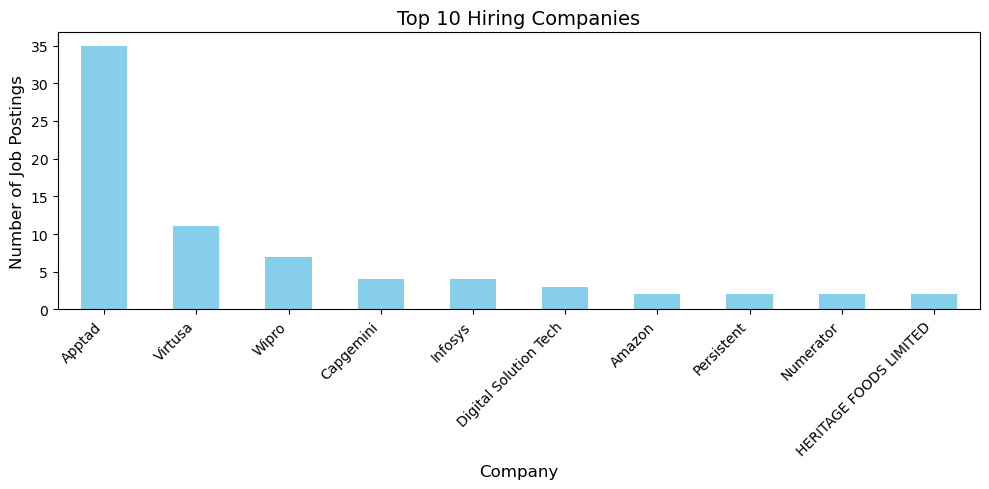

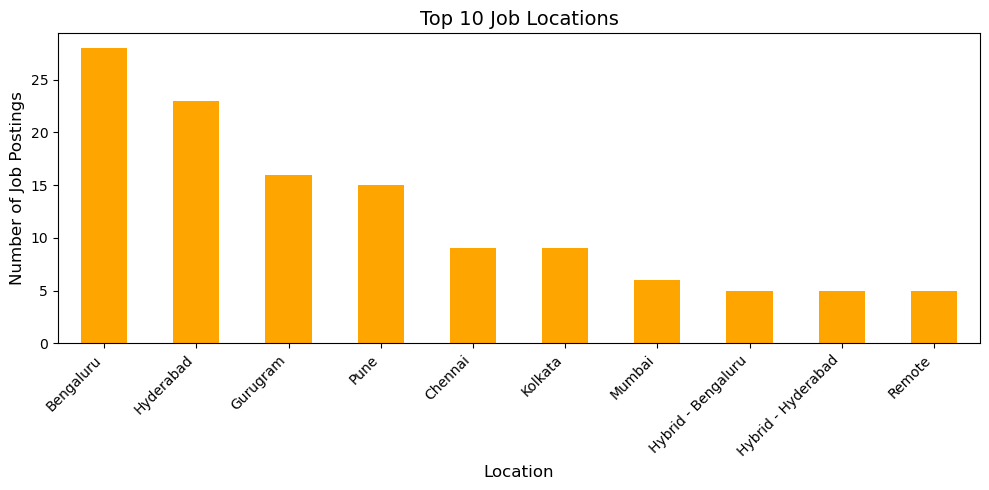

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your CSV (replace filename if different)
df = pd.read_csv("naukri_data_analyst_all_jobs.csv")

# ===== 1. Top Hiring Companies =====
top_companies = df['company'].value_counts().head(10)

plt.figure(figsize=(10, 5))
top_companies.plot(kind='bar', color='skyblue')
plt.title("Top 10 Hiring Companies", fontsize=14)
plt.xlabel("Company", fontsize=12)
plt.ylabel("Number of Job Postings", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# ===== 2. Location-based Insights =====
# Clean location column: take only first location if multiple are listed
df['primary_location'] = df['location'].apply(lambda x: str(x).split(',')[0].strip())

top_locations = df['primary_location'].value_counts().head(10)

plt.figure(figsize=(10, 5))
top_locations.plot(kind='bar', color='orange')
plt.title("Top 10 Job Locations", fontsize=14)
plt.xlabel("Location", fontsize=12)
plt.ylabel("Number of Job Postings", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [4]:
import pandas as pd

# Load CSV file (adjust path if needed)
df = pd.read_csv('naukri_data_analyst_all_jobs.csv')

# Preview first 5 rows
print(df.head())

# Drop NaN skills if any and split skills column into lists
df['skills'] = df['skills'].fillna('')

# Split skills, flatten the list and strip spaces
all_skills = df['skills'].str.split(',').explode().str.strip().str.lower()

# Count skill occurrences and get top 10 skills
top_skills = all_skills.value_counts().head(10).reset_index()
top_skills.columns = ['Skill', 'Count']
print(top_skills)

# Top 10 companies by job posting count
top_companies = df['company'].value_counts().head(10).reset_index()
top_companies.columns = ['Company', 'Job Postings']
print(top_companies)

# Top 10 locations by job posting count
top_locations = df['location'].value_counts().head(10).reset_index()
top_locations.columns = ['Location', 'Job Postings']
print(top_locations)

with pd.ExcelWriter('job_requirements_summary.xlsx') as writer:
    top_companies.to_excel(writer, sheet_name='Top Companies', index=False)
    top_skills.to_excel(writer, sheet_name='Top Skills', index=False)
    top_locations.to_excel(writer, sheet_name='Top Locations', index=False)

summary_text = f"""
# Job Requirements Summary Report

## Top Hiring Companies
{''.join([f"- {row['Company']}: {row['Job Postings']} job postings\n" for _, row in top_companies.iterrows()])}

## In-Demand Skills
{''.join([f"- {row['Skill'].title()}\n" for _, row in top_skills.iterrows()])}

## Popular Job Locations
{''.join([f"- {row['Location']}: {row['Job Postings']} job postings\n" for _, row in top_locations.iterrows()])}

## Recommendations for Recruitment Agency
- Focus sourcing efforts on top companies and locations.
- Target candidates with skills listed above.
- Regularly update job postings based on trending skills.

"""

print(summary_text)


              title               company                         location  \
0  Data Analyst - B             Capgemini                             Pune   
1      Data Analyst  Kotak Life Insurance        Mumbai Suburban, Goregaon   
2   Data Analyst L1                 Wipro                        Bengaluru   
3      Data Analyst       NCR Corporation                         Gurugram   
4      Data Analyst                   EXL  Hybrid - Noida, Pune, Bengaluru   

  experience                                             skills  \
0    2-5 Yrs  algorithms, charts, data analysis, data valida...   
1    1-3 Yrs  SQL, Alternate Channel, Power Bi, Data Visuali...   
2    1-5 Yrs  data analysis, data mining, data warehousing, ...   
3    2-4 Yrs  python, data analysis, data management, sql, d...   
4   5-10 Yrs  Conversational Ai, Data Analytics, Ab Testing,...   

          posted                                               link  
0     6 days ago  https://www.naukri.com/job-listings-data